## 决策树解决回归问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### Deciosion Tree Regressor（决策树的回归器）

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
dt_reg.score(X_test, y_test)

0.5958144107528762

In [6]:
dt_reg.score(X_train, y_train)

1.0

此时这颗决策树在训练数据集上预测准确率是百分百的，但是在测试数据集上只有60%的准确率，很显然出现了过拟合。

### 学习曲线

基于RMSE绘制学习曲线

In [7]:
X.shape

(506, 13)

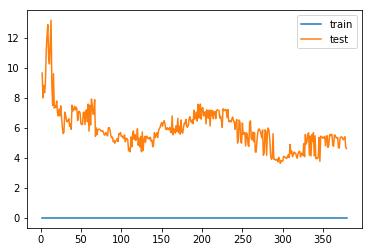

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(2, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
    
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               np.sqrt(train_score), label="train")
    plt.plot([i for i in range(2, len(X_train)+1)], 
                               np.sqrt(test_score), label="test")
    plt.legend()
    plt.show()
    
plot_learning_curve(DecisionTreeRegressor(), X_train, X_test, y_train, y_test)

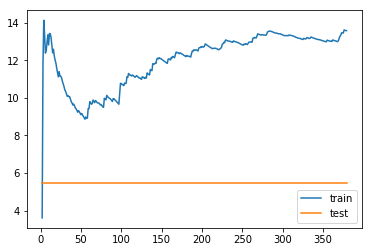